In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

kf =  [2.21604897e-08]


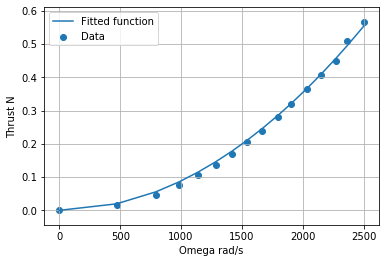

In [2]:
## Bitcraze Values


# Values sourced from: https://wiki.bitcraze.io/misc:investigations:thrust
amps = np.array([0.24,0.37,0.56,0.75,0.94,1.15,1.37,1.59,1.83,2.11,2.39,2.71,3.06,3.46,3.88,4.44])
thrust_g = np.array([0,1.6,4.8,7.9,10.9,13.9,17.3,21,24.4,28.6,32.8,37.3,41.7,46,51.9,57.9])
V = np.array([4.01,3.98,3.95,3.92,3.88,3.84,3.8,3.76,3.71,3.67,3.65,3.62,3.56,3.48,3.4,3.3])
PWM_percent = np.array([0,6.25,12.5,18.75,25,31.25,37.5,43.25,50,56.25,62.5,68.75,75,81.25,87.5,93.75])
omega_rpm = np.array([0,4485,7570,9374,10885,12277,13522,14691,15924,17174,18179,19397,20539,21692,22598,23882])

thrust_N = 9.8/1000*thrust_g
omega_rad = omega_rpm *2*np.pi/60

Kv = 14000 # rpm/V [https://www.seeedstudio.com/Crazyflie-2-0-Spare-7x16-mm-coreless-DC-motor-with-connector-p-2115.html]
V_Rated = 4.2 # V
amps_Rated = 1.0 # Amps


# Motor calcs sourced from: https://github.com/PX4/sitl_gazebo/issues/110
# Max Rotational Velocity = Kv * Max Applied Voltage * Max Motor Efficiency * 2π / 60 []
# Motor Constant = Thrust / (Ω) ²
# Moment Constant = 60 / (2π * Kv)
# Rotor Drag Coefficient = Thrust / (ρ * (Kv * Max Applied Voltage * Max Motor Efficiency / 60) ² * Propeller diameter ⁴)

# where,
# Kv [RPM/V]
# Max Thrust [N]
# Max Applied Voltage [V]
# Ω Rotor angular velocity [rad/s]
# ρ Air density at 20ºC: 1.2041 [kg/m³]

## Bitcraze k_f constant
plt.figure(1)
y_data = thrust_N
x_data = omega_rad
def test_func(x, a):
    return a*x**2

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data)
print("kf = ",params/4)

plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0]),
         label='Fitted function')

plt.legend(loc='best')
plt.xlabel("Omega rad/s")
plt.ylabel("Thrust N")
plt.grid(True)
plt.show()

Thrust [N] =  [2.16440175e-11 1.01580910e-06 7.19606544e-04]


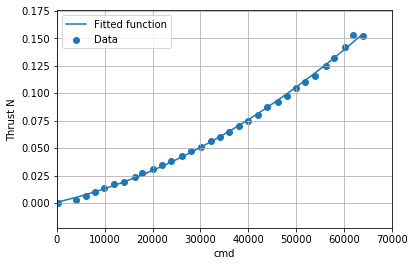

In [3]:
## Forster Thrust-cmd Data

data = pd.read_csv("Forster_Thrust_cmd.csv").to_numpy()
cmd = data[:,0]
thrust_N = data[:,1]

plt.figure(1)
y_data = thrust_N
x_data = cmd
def test_func(x,a,b,c):
    return a*x*x +b*x + c

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data)
print("Thrust [N] = ",params)

plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0],params[1],params[2]),
         label='Fitted function')

plt.legend(loc='best')
plt.xlabel("cmd")
plt.ylabel("Thrust N")
plt.xlim([0,70000])
plt.grid(True)
plt.show()

C_Tf =  [0.00611798]


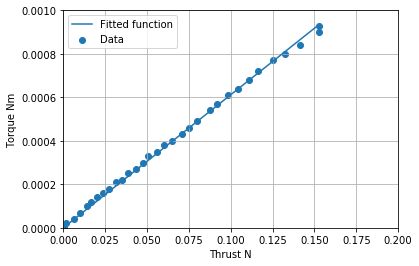

In [4]:
## Forster Thrust-Torque Data

data = pd.read_csv("Forster_Thrust_Torque.csv").to_numpy()
thrust_N = data[:,0]
torque_Nm = data[:,1]

plt.figure(1)
y_data = torque_Nm
x_data = thrust_N
def test_func(x,a):
    return a*x

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data)
print("C_Tf = ",params)

plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0]),
         label='Fitted function')

plt.legend(loc='best')
plt.xlabel("Thrust N")
plt.ylabel("Torque Nm")
plt.xlim([0,0.2])
plt.ylim([0,1e-3])
plt.grid(True)
plt.show()

kf =  [1.78669597e-08]


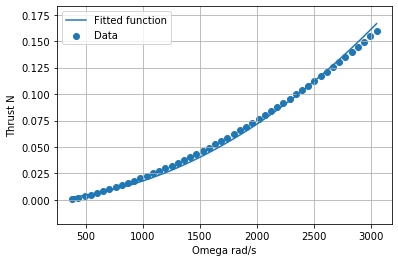

In [5]:
## Forster Thrust-Omega

cmd = np.linspace(0,65535,50)
fi = 2.130295e-11*cmd**2 + 1.032633e-6*cmd + 5.484560e-4 # N
wi = 0.04076521*cmd + 380.8359 # rad/s



plt.figure(2)
x_data = wi
y_data = fi

def test_func(x,a):
    return a*x**2

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data)
print("kf = ",params)

plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0]),
         label='Fitted function')

plt.legend(loc='best')
plt.xlabel("Omega rad/s")
plt.ylabel("Thrust N")
plt.grid(True)
plt.show()


a_z: [ 8.01597997 -7.29633171]


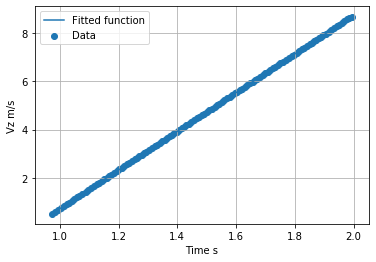

In [6]:
## Max Acceleration Verification Test (Gazebo)

data = pd.read_csv("Gazebo_acc_test.csv").to_numpy()
t = data[:,0]
vz = data[:,2]

plt.figure()
x_data = t
y_data = vz

def test_func(x,a,b):
    return a*x+b

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data)
print("a_z:",params)

plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0],params[1]),
         label='Fitted function')

plt.legend(loc='best')
plt.xlabel("Time s")
plt.ylabel("Vz m/s")
plt.grid(True)
plt.show()
# Something is off with these numbers

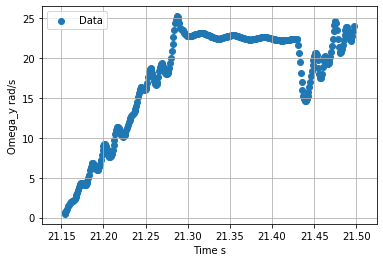

In [7]:
## Max Acceleration Verification Test (Gazebo)

data = pd.read_csv("angular_velocity.csv").to_numpy()
t = data[156:500,0]
omega_y = data[156:500,1]

plt.figure()
x_data = t
y_data = omega_y

# def test_func(x,a,b):
#     return a*x+b

# params, params_covariance = optimize.curve_fit(test_func, x_data, y_data)
# print("a_z:",params)
# plt.plot(x_data, test_func(x_data, params[0],params[1]),
#          label='Fitted function')

plt.scatter(x_data, y_data, label='Data')


plt.legend(loc='best')
plt.xlabel("Time s")
plt.ylabel("Omega_y rad/s")
plt.grid(True)
plt.show()
